In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import rotunno as rt
import continuous_N_helpers as cn
import mpmath

In [2]:
besselj = np.frompyfunc(mpmath.besselj, 2, 1)
pcfd = np.frompyfunc(mpmath.pcfd, 2, 1)

In [3]:
z = np.arange(0, 2, 1e-3)
x = np.arange(-1, 1, 1e-3)
X, Z = np.meshgrid(x, z)

N = 3
H1 = 1
k = np.pi
m = k

R = np.cos(m*H1) + 1j*N*np.sin(m*H1)

In [4]:
psi = np.zeros(Z.shape).astype(complex)
psi_inc_refr = np.zeros(Z.shape).astype(complex)
psi_refl = np.zeros(Z.shape).astype(complex)

psi[0:1000, :] = (N+1)/2*np.exp(1j*m*(Z[0:1000, :]-H1))
psi_inc_refr[0:1000, :] = (N+1)/2*np.exp(1j*m*(Z[0:1000, :]-H1))

psi[0:1000, :] += (1-N)/2*np.exp(-1j*m*(Z[0:1000, :]-H1))
psi_refl[0:1000, :] = (1-N)/2*np.exp(-1j*m*(Z[0:1000, :]-H1))

psi[0:1000, :] *= np.exp(1j*k*X[0:1000, :])
psi_inc_refr[0:1000, :] *= np.exp(1j*k*X[0:1000, :])
psi_refl[0:1000, :] *= np.exp(1j*k*X[0:1000, :])

psi[1000:, :] = np.exp(1j*m*N*(Z[1000:, :]-H1))*np.exp(1j*k*X[1000:, :])
psi_inc_refr[1000:, :] = np.exp(1j*m*N*(Z[1000:, :]-H1))*np.exp(1j*k*X[1000:, :])
psi_refl[1000:, :] = np.nan

psi *= 2/(N+1)
psi_inc_refr *= 2/(N+1)
psi_refl *= 2/(N+1)

In [5]:
t = np.arange(0, np.pi, np.pi/4)
t_lab = [
    r'$t=0$', r'$t=\frac{\pi}{4}$', 
    r'$t=\frac{2\pi}{4}$', r'$t=\frac{3\pi}{4}$']

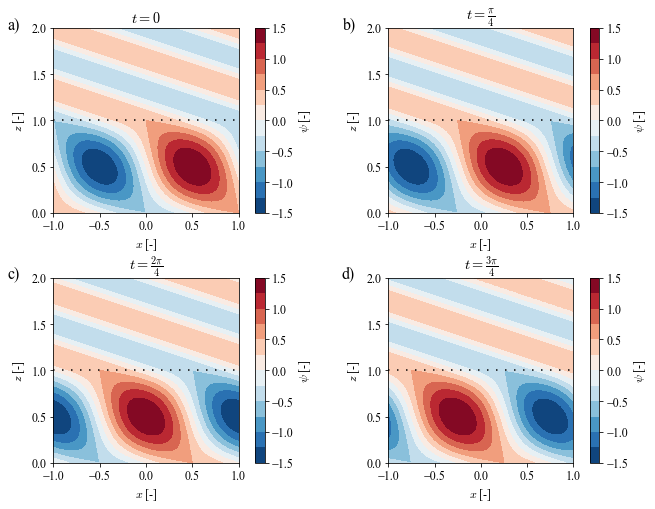

In [7]:
dl = .25
levels = np.arange(-1.5, 1.5+dl, dl)

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
rt.init_fonts()
rcParams.update({'font.size': 12})

for i in range(len(t)):
    axes.flatten()[i].plot([-1, 1], [1, 1], 'k', dashes=(1, 5), zorder=4)

    axes.flatten()[i].set_title(t_lab[i])
    con = axes.flatten()[i].contourf(
        X, Z, np.real(psi*np.exp(1j*t[i])),
        levels=levels, cmap='RdBu_r')
    axes.flatten()[i].set_xlim([-1, 1])
    axes.flatten()[i].set_ylim([0, 2])
    axes.flatten()[i].set_aspect('equal')
    cbar = plt.colorbar(con, ax=axes.flatten()[i])
    cbar.set_label(r'$\psi$ [-]')
    cbar.update_ticks()
    axes.flatten()[i].set_xlabel(r'$x$ [-]')
    axes.flatten()[i].set_ylabel(r'$z$ [-]')
    plt.subplots_adjust(hspace=0.35)
    plt.subplots_adjust(wspace=0)
    
rt.make_subplot_labels(axes=axes.flatten(), x_shift=-.25)
    
plt.savefig(
    '/home/student.unimelb.edu.au/shorte1/Documents/rotunno83/basic_sln1.png', 
    dpi=200, bbox_inches='tight', facecolor='white')

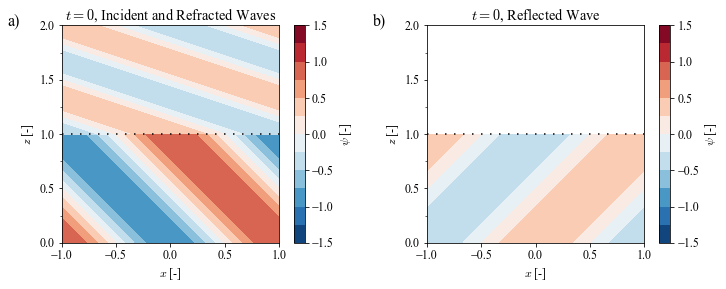

In [21]:
dl = .25
levels = np.arange(-1.5, 1.5+dl, dl)

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
rt.init_fonts()
rcParams.update({'font.size': 12})


axes[0].plot([-1, 1], [1, 1], 'k', dashes=(1, 5), zorder=4)

axes[0].set_title(r'$t=0$, Incident and Refracted Waves')
con = axes[0].contourf(
    X, Z, np.real(psi_inc_refr*np.exp(1j*0)),
    levels=levels, cmap='RdBu_r')
axes[0].set_xlim([-1, 1])
axes[0].set_ylim([0, 2])
axes[0].set_yticks(np.arange(0, 2.5, .5))
axes[0].set_yticks(np.arange(0, 2.25, .25), minor=True)
axes[0].set_aspect('equal')
cbar = plt.colorbar(con, ax=axes.flatten()[0])
cbar.set_label(r'$\psi$ [-]')
cbar.update_ticks()
axes[0].set_xlabel(r'$x$ [-]')
axes[0].set_ylabel(r'$z$ [-]')
plt.subplots_adjust(hspace=0.35)
plt.subplots_adjust(wspace=0)

axes[1].plot([-1, 1], [1, 1], 'k', dashes=(1, 5), zorder=4)

axes[1].set_title(r'$t=0$, Reflected Wave')
con = axes[1].contourf(
    X, Z, np.real(psi_refl*np.exp(1j*0)),
    levels=levels, cmap='RdBu_r')
axes[1].set_xlim([-1, 1])
axes[1].set_ylim([0, 2])
axes[1].set_yticks(np.arange(0, 2.5, .5))
axes[1].set_yticks(np.arange(0, 2.25, .25), minor=True)
axes[1].set_aspect('equal')
cbar = plt.colorbar(con, ax=axes.flatten()[1])
cbar.set_label(r'$\psi$ [-]')
cbar.update_ticks()
axes[1].set_xlabel(r'$x$ [-]')
axes[1].set_ylabel(r'$z$ [-]')
plt.subplots_adjust(hspace=0.35)
plt.subplots_adjust(wspace=.2)
    
rt.make_subplot_labels(axes=axes.flatten(), x_shift=-.25)
    
plt.savefig(
    '/home/student.unimelb.edu.au/shorte1/Documents/rotunno83/basic_sln1_decomp.png', 
    dpi=200, bbox_inches='tight', facecolor='white')

In [9]:
psi = np.zeros(Z.shape).astype(complex)
psi[0:1000, :] = np.sin(m*Z[0:1000, :])*np.exp(1j*k*X[0:1000, :])
psi[1000:, :] = np.abs(R)/N*np.sin(m*N*(Z[1000:, :]-H1)+np.angle(R))*np.exp(1j*k*X[1000:, :])

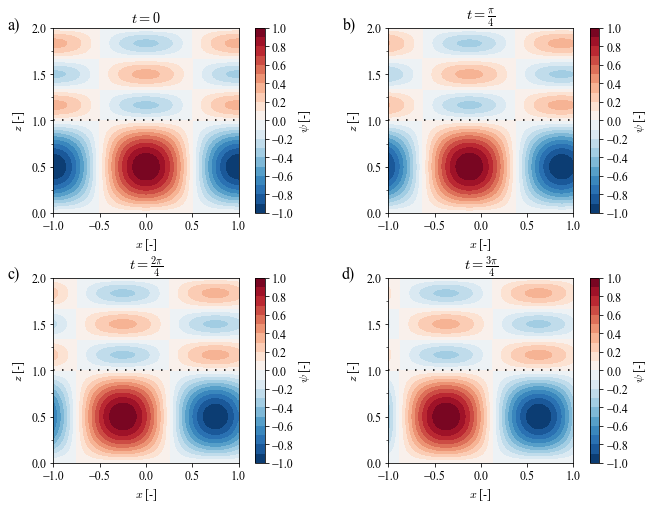

In [20]:
t = np.arange(0, np.pi/2, np.pi/8)
t_lab = [
    r'$t=0$', r'$t=\frac{\pi}{4}$', 
    r'$t=\frac{2\pi}{4}$', r'$t=\frac{3\pi}{4}$']

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
dl = .1
levels = np.arange(-1, 1+dl, dl)
styles = []

rt.init_fonts()

for i in range(len(levels)):
    if levels[i] >= 0:
        styles.append('-')
    else:
        styles.append('--')

for i in range(len(t)):
    axes.flatten()[i].plot([-1, 1], [1, 1], 'k', dashes=(1, 5), zorder=4)  
    axes.flatten()[i].set_title(t_lab[i])
    con = axes.flatten()[i].contourf(
        X, Z, np.real(psi*np.exp(1j*t[i])),
        levels=levels, linestyles=styles, cmap='RdBu_r')
    axes.flatten()[i].set_xlim([-1, 1])
    axes.flatten()[i].set_ylim([0, 2])
    axes.flatten()[i].set_yticks(np.arange(0, 2.5, .5))
    axes.flatten()[i].set_yticks(np.arange(0, 2.25, .25), minor=True)
    axes.flatten()[i].set_aspect('equal')
    cbar = plt.colorbar(con, ax=axes.flatten()[i])
    cbar.set_ticks(levels[::2])
    cbar.set_label(r'$\psi$ [-]')
    cbar.update_ticks()
    axes.flatten()[i].set_xlabel(r'$x$ [-]')
    axes.flatten()[i].set_ylabel(r'$z$ [-]')
    plt.subplots_adjust(hspace=0.35)
    plt.subplots_adjust(wspace=0)
    
rt.make_subplot_labels(axes=axes.flatten(), x_shift=-.25)
    
plt.savefig(
    '/home/student.unimelb.edu.au/shorte1/Documents/rotunno83/basic_sln2.png', 
    dpi=200, bbox_inches='tight', facecolor='white')

In [11]:
def calc_G_pwc(X, Z, N, m, H1, zp):
    
    G = np.zeros(Z.shape).astype(complex)
        
    zp_ind = np.argmin(np.abs(zp-Z[:,0]))
    H1_ind = np.argmin(np.abs(H1-Z[:,0]))
    
#     import pdb; pdb.set_trace()

    f1 = (N+1)*np.exp(-1j*m*H1)
    f2 = (1-N)*np.exp(1j*m*H1)
    g1 = np.cos(m*H1)+1j*N*np.sin(m*H1)
    g2 = np.cos(m*H1)-1j*N*np.sin(m*H1)
    # P = np.exp(1j*m*H1*N)*g2
    P = (f1+f2)/2
    
    if zp <= H1:
        G[0:zp_ind, :] = (N+1)/2*np.exp(1j*m*(zp-H1))
        G[0:zp_ind, :] += (1-N)/2*np.exp(-1j*m*(zp-H1))
        G[0:zp_ind, :] *= -1/(m*P)*np.sin(m*Z[0:zp_ind, :])
        
        G[zp_ind:H1_ind, :] = (N+1)/2*np.exp(1j*m*(Z[zp_ind:H1_ind, :]-H1))
        G[zp_ind:H1_ind, :] += (1-N)/2*np.exp(-1j*m*(Z[zp_ind:H1_ind, :]-H1))
        G[zp_ind:H1_ind, :] *= -1/(m*P)*np.sin(m*zp)
        
        G[H1_ind:, :] = np.exp(1j*m*N*(Z[H1_ind:, :]-H1))
        G[H1_ind:, :] *= -1/(m*P)*np.sin(m*zp)
        
        sf = (N+1)/2*np.exp(1j*m*(zp-H1))
        sf += (1-N)/2*np.exp(-1j*m*(zp-H1))
        sf *= -1/(m*P)*np.sin(m*zp)
        
        G = G/sf
    else:
        G[0:H1_ind] = -1/(m*g2)*np.exp(1j*m*N*(zp-H1))*np.sin(m*Z[0:H1_ind])
        
        G[H1_ind:zp_ind] = g1*np.exp(1j*m*N*(Z[H1_ind:zp_ind]-H1))
        G[H1_ind:zp_ind] += -g2*np.exp(-1j*m*N*(Z[H1_ind:zp_ind]-H1))
        G[H1_ind:zp_ind] *= -1/(2*1j*m*N*g2)*np.exp(1j*m*N*(zp-H1))
        
        G[zp_ind:] = g1*np.exp(1j*m*N*(zp-H1))
        G[zp_ind:] += -g2*np.exp(-1j*m*N*(zp-H1))
        G[zp_ind:] *= -1/(2*1j*m*N*g2)*np.exp(1j*m*N*(Z[zp_ind:]-H1))
        
        sf = g1*np.exp(1j*m*N*(zp-H1))
        sf += -g2*np.exp(-1j*m*N*(zp-H1))
        sf *= -1/(2*1j*m*N*g2)*np.exp(1j*m*N*(zp-H1))
        
        G = G/sf
        
    return G
        

In [22]:
def plot_G(fig, axes, X, Z, G, levels, H1, zp, title='', H2=None, dl=None):
    
    rt.init_fonts()
    
    if dl is None:
        dl = .1
    scale = 1/(2*dl)
    G_max = np.max(np.ceil(np.abs(np.real(G[:])*scale)))/scale

    levels = np.arange(-G_max, G_max+dl, dl)
    
    con = axes.contourf(X, Z, np.real(G), cmap='RdBu_r', levels=levels)

    axes.set_xlim([-1, 1])
    axes.set_ylim([0, 2])
    axes.set_aspect('equal')

    axes.plot([-1, 1], [H1, H1], 'k', dashes=(1, 5), zorder=4)
    axes.plot([-1, 1], [zp, zp], linestyle='dashdot', color='grey')
    
    if H2 is not None:
        axes.plot([-1, 1], [H2, H2], 'k', dashes=(1, 5), zorder=4)

    cbar = plt.colorbar(con, ax=axes)
    cbar.set_ticks(levels[::2])
    cbar.set_label(r'$\psi$ [-]')
    cbar.update_ticks()

    axes.set_xlabel(r'$x$ [-]')
    axes.set_ylabel(r'$z$ [-]')
    axes.set_yticks(np.arange(0, 2.5, .5))
    axes.set_yticks(np.arange(0, 2.25, .25), minor=True)
    axes.set_title(title)

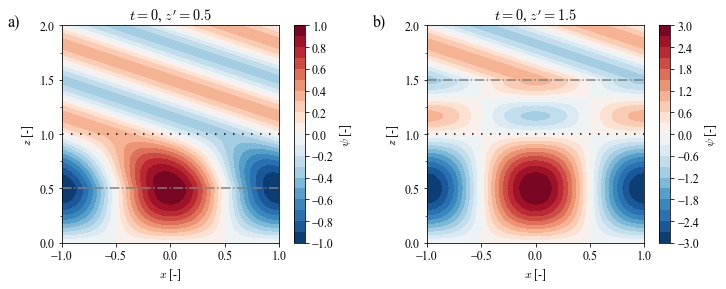

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

H1 = 1
zp = .5
G = calc_G_pwc(X, Z, N, m, H1, zp)
G *= np.exp(1j*k*X)

plot_G(fig, axes[0], X, Z, G, levels, H1, zp, title="$t=0$, $z'=0.5$", dl=.1)

H1 = 1
zp = 1.5
G = calc_G_pwc(X, Z, N, m, H1, zp)
G *= np.exp(1j*k*X)

plot_G(fig, axes[1], X, Z, G, levels, H1, zp, title="$t=0$, $z'=1.5$", dl=.3)

# plt.subplots_adjust(hspace=0.8)
# plt.subplots_adjust(wspace=0)
    
rt.make_subplot_labels(axes=axes.flatten(), x_shift=-.25)

plt.savefig(
    '/home/student.unimelb.edu.au/shorte1/Documents/rotunno83/pwc_G.png', 
    dpi=200, bbox_inches='tight', facecolor='white')

In [24]:
def calc_G_tl(X, z, N, m, H1, H2, zp):
    
    green = np.zeros(z.shape).astype(complex)
    A0 = 1
        
    zp_ind = np.argmin(np.abs(zp-z))
    H1_ind = np.argmin(np.abs(H1-z))
    H2_ind = np.argmin(np.abs(H2-z))
    
    G = (N-1)/(H2-H1)

    theta_1, A_1 = cn.calc_theta_A(H1, k, N, H1, G, A0)
    dA_1 = cn.calc_dA(H1, k, N, H1, G, A0)
    alpha_1 = cn.calc_alpha(H1, k, N, H1, G, A0)
    
    theta_2, A_2 = cn.calc_theta_A(H2, k, N, H1, G, A0)
    dA_2 = cn.calc_dA(H2, k, N, H1, G, A0)
    alpha_2 = cn.calc_alpha(H2, k, N, H1, G, A0)
    
    f_1 = cn.calc_f(H1, k, N, H1, G, A0)
    f_2 = cn.calc_f(H2, k, N, H1, G, A0)
    f = cn.calc_f(z, k, N, H1, G, A0)
    
    Da_1 = np.array(pcfd(-1/2, (1+1j)*f_1)).astype(complex)
    Da_2 = np.array(pcfd(-1/2, (1+1j)*f_2)).astype(complex)
    Db_1 = np.array(pcfd(-1/2, (1-1j)*f_1)).astype(complex)
    Db_2 = np.array(pcfd(-1/2, (1-1j)*f_2)).astype(complex)
    
    gamma = (m*np.cos(m*H1)+np.sin(m*H1)*(-dA_1/A_1+alpha_1))/(2*alpha_1)

    beta_p = (1j*m*N+alpha_2-dA_2/A_2)/(2*alpha_2)

    X_p = 1/2*((1-beta_p)*(Da_1/Da_2)+beta_p*(Db_1/Db_2))
    Y_p = 1j/(2*m)*(
        (1-beta_p)*(Da_1/Da_2)*(-alpha_1+dA_1/A_1)
        + beta_p*(Db_1/Db_2)*(alpha_1+dA_1/A_1))
    
    P = (X_p+Y_p)*np.exp(1j*m*H1)+(X_p-Y_p)*np.exp(-1j*m*H1)

    mu_p = gamma*(1-beta_p)*Db_2*Da_1-(np.sin(m*H1)-gamma)*beta_p*Da_2*Db_1

    T = 1/2*((np.sin(m*H1)-gamma)*(Da_2/Da_1)+gamma*(Db_2/Db_1))
    S = 1/(2*1j*m*N)*(
        (np.sin(m*H1)-gamma)*(Da_2/Da_1)*(-alpha_2+dA_2/A_2)
        + gamma*(Db_2/Db_1)*(alpha_2+dA_2/A_2))
    
    # Getting first cylinder function - please wait
    Da = np.ones(len(z)).astype(complex)*np.nan
    Db = np.ones(len(z)).astype(complex)*np.nan
    
    Da[H1_ind:H2_ind] = np.array(pcfd(-1/2, (1+1j)*f[H1_ind:H2_ind])).astype(complex)
    Db[H1_ind:H2_ind] = np.array(pcfd(-1/2, (1-1j)*f[H1_ind:H2_ind])).astype(complex)
    
    if zp <= H1:
        green[0:zp_ind] = (X_p-Y_p)*np.exp(1j*m*(zp-H1))
        green[0:zp_ind] += (X_p+Y_p)*np.exp(-1j*m*(zp-H1))
        green[0:zp_ind] *= -1/(m*P)*np.sin(m*z[0:zp_ind]) 
        
        green[zp_ind:H1_ind] = (X_p-Y_p)*np.exp(1j*m*(z[zp_ind:H1_ind]-H1))
        green[zp_ind:H1_ind] += (X_p+Y_p)*np.exp(-1j*m*(z[zp_ind:H1_ind]-H1))
        green[zp_ind:H1_ind] *= -1/(m*P)*np.sin(m*zp) 
        
        green[H1_ind:H2_ind] = (1-beta_p)*Da[H1_ind:H2_ind]/Da_2 + beta_p*Db[H1_ind:H2_ind]/Db_2
        green[H1_ind:H2_ind] *= -1/(m*P)*np.sin(m*zp)
        
        green[H2_ind:] = -1/(m*P)*np.sin(m*zp)*np.exp(1j*m*N*(z[H2_ind:]-H2))
        
        sf = (X_p-Y_p)*np.exp(1j*m*(zp-H1))
        sf += (X_p+Y_p)*np.exp(-1j*m*(zp-H1))
        sf *= -1/(m*P)*np.sin(m*zp)
        
        green = green/sf
        
    elif zp > H1 and zp <= H2:

        f_zp = cn.calc_f(zp, k, N, H1, G, A0)
        alpha_zp = cn.calc_alpha(zp, k, N, H1, G, A0)
        
        Da_zp = np.array(pcfd(-1/2, (1+1j)*f_zp)).astype(complex)
        Db_zp = np.array(pcfd(-1/2, (1-1j)*f_zp)).astype(complex)

        U_zp = -Da_2*Db_1*Da_1*beta_p/(2*mu_p*alpha_zp*Da_zp)
        U_zp += -Db_2*Db_1*Da_1*(1-beta_p)/(2*mu_p*alpha_zp*Db_zp)
        
        V_zp = -Da_1*Db_2*Da_2*gamma/(2*mu_p*alpha_zp*Da_zp)
        V_zp += -Db_1*Db_2*Da_2*(np.sin(m*H1)-gamma)/(2*mu_p*alpha_zp*Db_zp)
        
        green[0:H1_ind] = U_zp*np.sin(m*z[0:H1_ind])
        
        green[H1_ind:zp_ind] = (np.sin(m*H1)-gamma)*Da[H1_ind:zp_ind]/Da_1
        green[H1_ind:zp_ind] += gamma*Db[H1_ind:zp_ind]/Db_1
        green[H1_ind:zp_ind] *= U_zp
        
        green[zp_ind:H2_ind] = (1-beta_p)*Da[zp_ind:H2_ind]/Da_2 
        green[zp_ind:H2_ind] += beta_p*Db[zp_ind:H2_ind]/Db_2
        green[zp_ind:H2_ind] *= V_zp
        
        green[H2_ind:] = V_zp*np.exp(1j*m*N*(z[H2_ind:]-H2))
        
        sf = (1-beta_p)*Da_zp/Da_2 
        sf += beta_p*Db_zp/Db_2
        sf *= V_zp
        
        green = green/sf
    else:
        
        green[0:H1_ind] = np.exp(1j*m*N*(zp-H2))*np.sin(m*z[0:H1_ind])
        green[0:H1_ind] *= -1/(2*1j*m*N*(S-T))
        
        green[H1_ind:H2_ind] = (np.sin(m*H1)-gamma)*Da[H1_ind:H2_ind]/Da_1
        green[H1_ind:H2_ind] += gamma*Db[H1_ind:H2_ind]/Db_1
        green[H1_ind:H2_ind] *= -1/(2*1j*m*N*(S-T))*np.exp(1j*m*N*(zp-H2))
        
        green[H2_ind:zp_ind] = (S+T)*np.exp(1j*m*N*(z[H2_ind:zp_ind]-H2))
        green[H2_ind:zp_ind] += -(S-T)*np.exp(-1j*m*N*(z[H2_ind:zp_ind]-H2))
        green[H2_ind:zp_ind] *= np.exp(1j*m*N*(zp-H2))
        green[H2_ind:zp_ind] *= -1/(2*1j*m*N*(S-T))
        
        green[zp_ind:] = (S+T)*np.exp(1j*m*N*(zp-H2))
        green[zp_ind:] += -(S-T)*np.exp(-1j*m*N*(zp-H2))
        green[zp_ind:] *= np.exp(1j*m*N*(z[zp_ind:]-H2))
        green[zp_ind:] *= -1/(2*1j*m*N*(S-T))
        
        sf = (S+T)*np.exp(1j*m*N*(zp-H2))
        sf += -(S-T)*np.exp(-1j*m*N*(zp-H2))
        sf *= np.exp(1j*m*N*(zp-H2))
        sf *= -1/(2*1j*m*N*(S-T))
        
        green = green/sf
    
    return np.tile(np.expand_dims(green, 1), (1, len(x)))

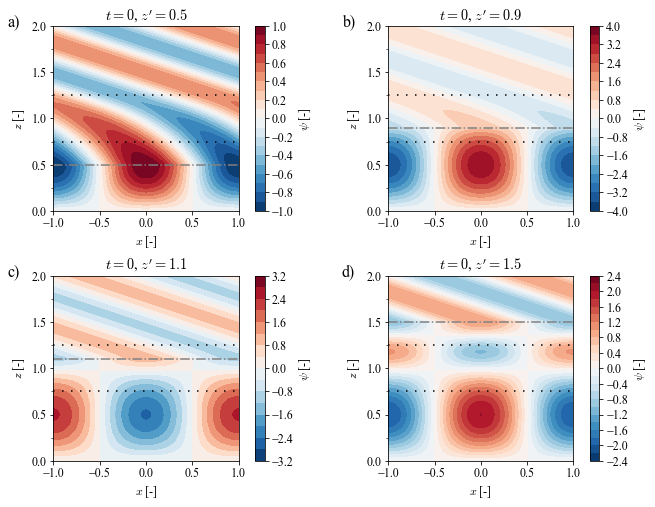

In [25]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

H1 = .75
H2 = 1.25
zp = .5

G = calc_G_tl(X, z, N, m, H1, H2, zp)
G *= np.exp(1j*k*X)

plot_G(
    fig, axes.flatten()[0], X, Z, G, levels, H1, zp, 
    title="$t=0$, $z'={:02}$".format(zp), dl=.1, H2=H2)
# plt.savefig(
#     '/home/student.unimelb.edu.au/shorte1/Documents/rotunno83/tl_G_low.png', 
#     dpi=200, bbox_inches='tight', facecolor='white')

H1 = .75
H2 = 1.25
zp = .9

G = calc_G_tl(X, z, N, m, H1, H2, zp)
G *= np.exp(1j*k*X)

plot_G(
    fig, axes.flatten()[1], X, Z, G, levels, H1, zp, 
    title="$t=0$, $z'={:2}$".format(zp), dl=.4, H2=H2)

H1 = .75
H2 = 1.25
zp = 1.1

G = calc_G_tl(X, z, N, m, H1, H2, zp)
G *= np.exp(1j*k*X)

plot_G(
    fig, axes.flatten()[2], X, Z, G, levels, H1, zp, 
    title="$t=0$, $z'={:2}$".format(zp), dl=.4, H2=H2)

# plt.savefig(
#     '/home/student.unimelb.edu.au/shorte1/Documents/rotunno83/tl_G_mid.png', 
#     dpi=200, bbox_inches='tight', facecolor='white')

H1 = .75
H2 = 1.25
zp = 1.5

G = calc_G_tl(X, z, N, m, H1, H2, zp)
G *= np.exp(1j*k*X)

plot_G(
    fig, axes.flatten()[3], X, Z, G, levels, H1, zp, 
    title="$t=0$, $z'={:02}$".format(zp), dl=.2, H2=H2)

plt.subplots_adjust(hspace=0.35)
plt.subplots_adjust(wspace=0)
    
rt.make_subplot_labels(axes=axes.flatten(), x_shift=-.25)

plt.savefig(
    '/home/student.unimelb.edu.au/shorte1/Documents/rotunno83/tl_G.png', 
    dpi=200, bbox_inches='tight', facecolor='white')

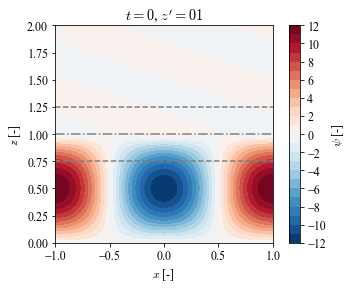

In [137]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))

H1 = .75
H2 = 1.25
zp = 1

G = calc_G_tl(X, z, N, m, H1, H2, zp)
G *= np.exp(1j*k*X)

plot_G(
    fig, ax, X, Z, G, levels, H1, zp, 
    title="$t=0$, $z'={:02}$".format(zp), dl=1, H2=H2)
# plt.savefig(
#     '/home/student.unimelb.edu.au/shorte1/Documents/rotunno83/tl_G_low.png', 
#     dpi=200, bbox_inches='tight', facecolor='white')


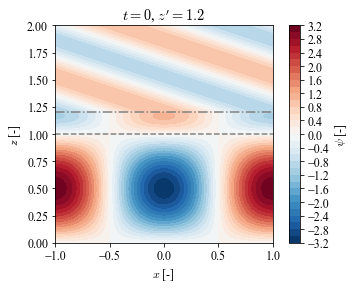

In [157]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))

H1 = 1
zp = 1.2

G = calc_G_pwc(X, Z, N, m, H1, zp)
G *= np.exp(1j*k*X)

plot_G(
    fig, ax, X, Z, G, levels, H1, zp, 
    title="$t=0$, $z'={:02}$".format(zp), dl=.2)
# plt.savefig(
#     '/home/student.unimelb.edu.au/shorte1/Documents/rotunno83/tl_G_low.png', 
#     dpi=200, bbox_inches='tight', facecolor='white')
